# US Greenhouse Gas Emissions Data

In [1]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.pyplot import figure
import datetime as dt
from scipy.stats import linregress
import matplotlib.image as mpimg
from PIL import Image

## Reading, Cleaning, Splitting, Changing Data Types, and Creating Dataframes (US Greenhouse Gas Emissions)

In [2]:
# Declaring Variable Names for Greenhouse Gas Emissions Data CSV file.

USGGED = 'U.S. Greenhouse Gas Emissions.csv'

In [3]:
# from sample code from 'pandas_reading_files' example in Pandas Activities
# Creating a data frame for Energy Data called 'EnergyDataFrame'

EmissionsDataFrame1 = pd.read_csv(USGGED)
EmissionsDataFrame1.rename(columns={'Gas': 'Year'}, inplace=True)
EmissionsDataFrame1.head()


,Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Carbon dioxide,5121.179440,5071.563914,5174.670601,5281.386608,5375.033803,5436.697986,5625.041885,5701.920919,5749.893056,...,5928.256329,5493.547908,5700.108337,5572.584775,5371.777170,5522.908365,5572.106312,5422.965677,5306.662457,5270.748525
1,Methane,779.845550,784.384856,783.176602,770.308404,775.160651,767.845344,759.491158,744.932926,729.618317,...,702.303384,692.676127,697.450404,675.544902,665.372404,663.042641,662.064221,661.395920,654.897884,656.316679
2,Nitrous oxide,370.307694,368.961757,371.786442,385.347234,376.511527,388.502830,395.545749,386.608376,402.495771,...,374.546556,373.259958,382.929378,375.073815,348.876128,365.354277,362.742736,374.108885,364.485759,360.515661
3,Fluorinated gases,99.667859,90.704668,95.300712,95.027350,98.129806,117.021137,127.620262,134.999750,150.518866,...,155.494544,149.885151,158.103563,164.215536,159.943630,158.912892,163.082364,165.304997,166.221325,169.137327
4,Total,6371.000543,6315.615194,6424.934357,6532.069596,6624.835787,6710.067297,6907.699054,6968.461971,7032.526010,...,7160.600813,6709.369145,6938.591681,6787.419028,6545.969331,6710.218175,6759.995633,6623.775479,6492.267425,6456.718193


In [4]:
EmissionsDataFrame2 = EmissionsDataFrame1.drop(EmissionsDataFrame1.index[[0,1,2,3]])


In [5]:
EmissionsDataFrame2.head()

,Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
4,Total,6371.000543,6315.615194,6424.934357,6532.069596,6624.835787,6710.067297,6907.699054,6968.461971,7032.52601,...,7160.600813,6709.369145,6938.591681,6787.419028,6545.969331,6710.218175,6759.995633,6623.775479,6492.267425,6456.718193


In [6]:
EmissionsDataFrame3 = EmissionsDataFrame2.set_index('Year')
EmissionsDataFrame3.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Year,,,,,,,,,,,,,,,,,,,,,
Total,6371.000543,6315.615194,6424.934357,6532.069596,6624.835787,6710.067297,6907.699054,6968.461971,7032.52601,7071.461457,...,7160.600813,6709.369145,6938.591681,6787.419028,6545.969331,6710.218175,6759.995633,6623.775479,6492.267425,6456.718193


In [7]:
EmissionsDataFrame4 = EmissionsDataFrame3.T
EmissionsDataFrame4.head()

Year,Total
1990,6371.000543
1991,6315.615194
1992,6424.934357
1993,6532.069596
1994,6624.835787


In [8]:
EmissionsDataFrame4.reset_index(drop=False, inplace=True)
EmissionsDataFrame4.head()

Year,index,Total
0,1990,6371.000543
1,1991,6315.615194
2,1992,6424.934357
3,1993,6532.069596
4,1994,6624.835787


In [9]:
EmissionsDataFrame4 = EmissionsDataFrame4.rename(columns={'index': 'Year'})
EmissionsDataFrame4.reset_index(drop=True, inplace=True)
EmissionsDataFrame4

Year,Year,Total
0,1990,6371.000543
1,1991,6315.615194
2,1992,6424.934357
3,1993,6532.069596
4,1994,6624.835787
5,1995,6710.067297
6,1996,6907.699054
7,1997,6968.461971
8,1998,7032.526010
9,1999,7071.461457


In [10]:
EmissionsDataFrame4.dtypes

Year
Year      object
Total    float64
dtype: object

In [11]:
EmissionsDataFrame4.Year = EmissionsDataFrame4.Year.astype(int)

In [12]:
EmissionsDataFrame4.dtypes

Year
Year       int64
Total    float64
dtype: object

## Analyzing and Visualizing Data (US Greenhouse Gas Emissions)

### US Greenhouse Gas Emissions

In [13]:
# Set data

EmissionsX = EmissionsDataFrame4.Year
EmissionsY = EmissionsDataFrame4.Total


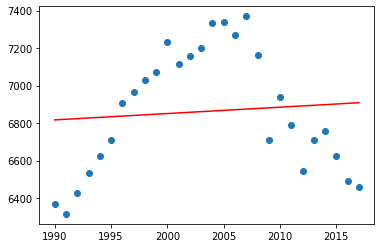

In [14]:
# Draw 'best fit line' 

stats = linregress(EmissionsX, EmissionsY)

m = stats.slope
b = stats.intercept

plt.scatter(EmissionsX, EmissionsY)
plt.plot(EmissionsX, m * EmissionsX + b, color="red")  
plt.savefig("ProjectionsForGlobalEmissions.png")

In [15]:
print(m)
print(b)

3.391440238088402
68.13230890273371


In [16]:
y=(m*2025)+b
print(y)

6935.798791031748


In [17]:
ProjectedGreenhouseGasPercentReductionby2025RelativeTo2005 = (7339 - 6936)/6936*100
print(ProjectedGreenhouseGasPercentReductionby2025RelativeTo2005)

5.810265282583622
